<a href="https://colab.research.google.com/github/CeaPanochka/NNandMnADIP/blob/main/%D0%A6%D1%8B%D0%B1%D1%83%D0%BB%D0%B0%D0%B5%D0%B2_3_%D0%9C%D0%B8%D0%90%D0%A6%D0%9E%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
from sklearn.cluster import KMeans
import cv2
import numpy as np
import imutils
import pandas as pd

In [ ]:
img = cv2.imread('cat.jpg') # Вводим исходное изображение
print("Img's shape: ", img.shape)

Img's shape:  (177, 284, 3)


In [ ]:
img_r = (img / 255.0).reshape(-1,3) # Нормализуем изображение
print("New shape (img_r): ", img_r.shape)

New shape (img_r):  (50268, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 0.7084691524505615 seconds ---
Compressed image's shape:  (177, 284, 3)


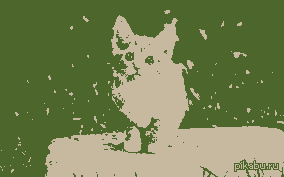

15307


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 0.9745512008666992 seconds ---
Compressed image's shape:  (177, 284, 3)


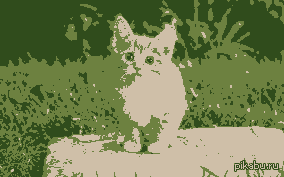

25278


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 0.8946661949157715 seconds ---
Compressed image's shape:  (177, 284, 3)


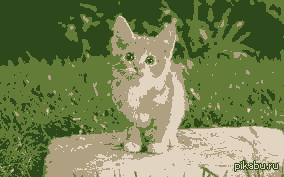

27570


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 1.1569714546203613 seconds ---
Compressed image's shape:  (177, 284, 3)


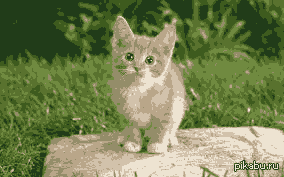

29217


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 3.3980820178985596 seconds ---
Compressed image's shape:  (177, 284, 3)


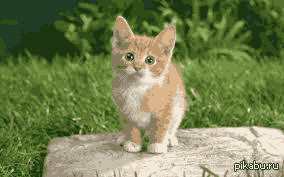

28298


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 3.422300338745117 seconds ---
Compressed image's shape:  (177, 284, 3)


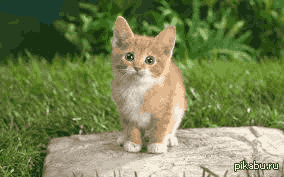

27331


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 9.124470233917236 seconds ---
Compressed image's shape:  (177, 284, 3)


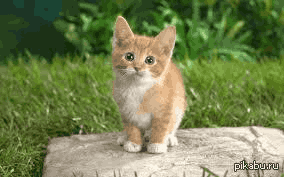

25586


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 19.528749227523804 seconds ---
Compressed image's shape:  (177, 284, 3)


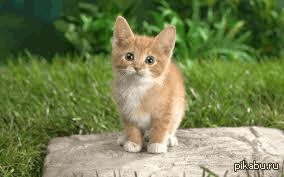

23987


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 48.28134775161743 seconds ---
Compressed image's shape:  (177, 284, 3)


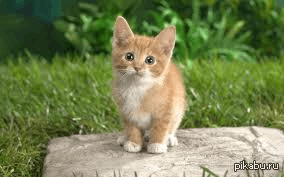

22569


In [ ]:
COLORS = [2, 3, 4, 8, 16, 32, 64, 128, 256]
new_img = []

table = []

for c in COLORS:
  start_time = time.time()
  k_colors = KMeans(n_clusters=c).fit(img_r)
  imgC = k_colors.cluster_centers_[k_colors.labels_]
  time_value = time.time() - start_time
  print("--- %s seconds ---" % (time_value))
  imgC = (np.reshape(imgC, (img.shape))*255).astype(np.uint8) # Возвращаем изображению исходные параметры
  print("Compressed image's shape: ", imgC.shape)

  cv2_imshow(imgC)
  cv2.imwrite(f'Scikit_Compressor/Compressed_{c}.jpg', imgC)
  img_size = os.stat(f'Scikit_Compressor/Compressed_{c}.jpg').st_size
  print(img_size)

  table.append([c, img_size, time_value])

In [ ]:
df = pd.DataFrame(table, columns=['К-во цветов', 'Объём в байтах', 'Время'])
df

,К-во цветов,Объём в байтах,Время
0,2,15307,0.708469
1,3,25278,0.974551
2,4,27570,0.894666
3,8,29217,1.156971
4,16,28298,3.398082
5,32,27331,3.422300
6,64,25586,9.124470
7,128,23987,19.528749
8,256,22569,48.281348


In [ ]:
def kmeans(Input,K,Max_iters):
    
    N,D = np.shape(Input)
    R = np.random.permutation(N)
    Kvec = Input[R[0:K],:]
    Distance = np.zeros((N,K))
    
    for nn in range(0,Max_iters):
        F = np.zeros((N,K))
        for kk in range(0,K):
            Distance[:,kk] = np.sum( np.square(Input - np.tile( Kvec[kk,:], (N,1)),dtype=np.float64),axis=1 )
        Dmin = Distance.argmin(axis=1) % Distance.shape[1]
        for mm in range(0,K):
            if np.size(Dmin[mm==Dmin]) >0:
                Kvec[mm,:] = np.mean(Input[mm==Dmin],axis=0)
        for ii in range(0,N):
            F[ii,Dmin[ii]] = 1
        error = sum(sum((F*Distance)/N))
        # print('Error = ' + str(error))
    return Kvec, Dmin

In [ ]:
import time
import os

Количество итераций 15
--- 2.5145015716552734 seconds ---


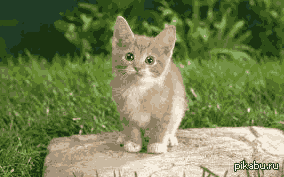

11066
Количество итераций 20
--- 2.025670289993286 seconds ---


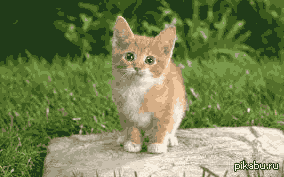

11200
Количество итераций 30
--- 2.9749691486358643 seconds ---


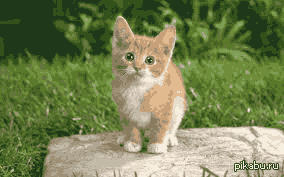

11155
Количество итераций 40
--- 5.088847875595093 seconds ---


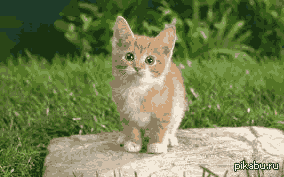

11111
Количество итераций 50
--- 4.9292683601379395 seconds ---


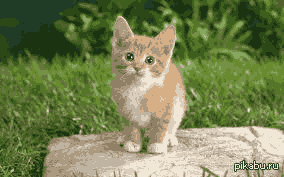

11200
Количество итераций 100
--- 11.168570041656494 seconds ---


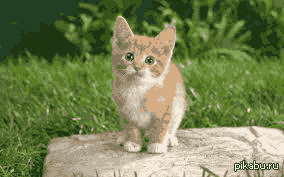

11158


In [ ]:
Datain = np.asarray(Image.open('cat.jpg'),dtype=np.float64)

ReshapedData = np.reshape(Datain, (np.size(Datain,0) * np.size(Datain,1),np.size(Datain,2)))

# K = [2, 3, 4, 8, 16, 32, 64, 128, 256] # устанавливаем количество цветов
K = 16
Max_iters = [15, 20, 30, 40, 50, 100] # устанавливаем количество итераций, чем больше итераций, тем тщательнее будет осуществляться кластеризация и тем дольше будет работать программа

for i in Max_iters:
  print('Количество итераций', i)
  start_time = time.time()
  Kvec,Dmin = kmeans(ReshapedData,K,i)
  print("--- %s seconds ---" % (time.time() - start_time))

  Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))

  for jj in range(0,K):
      Dvec[jj==Dmin,:] = Kvec[jj,:]

  imout = np.reshape(np.uint8(Dvec), (np.size(Datain,0),np.size(Datain,1),len(Kvec[0,:])))

  im = Image.fromarray(imout,'RGB')
  im.show()
  im.save('output.jpeg', "JPEG", optimize = True)
  print(os.stat('output.jpeg').st_size)

Количество цветов 2
--- 2.2223761081695557 seconds ---


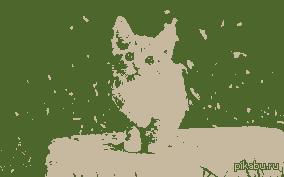

7183
Количество цветов 3
--- 3.7968969345092773 seconds ---


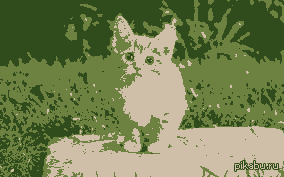

11283
Количество цветов 4
--- 5.195020437240601 seconds ---


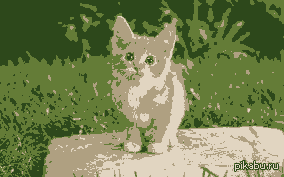

11778
Количество цветов 8
--- 4.5357208251953125 seconds ---


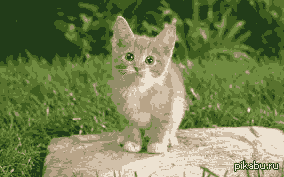

11351
Количество цветов 16
--- 7.440145969390869 seconds ---


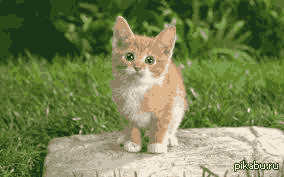

11235
Количество цветов 32
--- 6.313247203826904 seconds ---


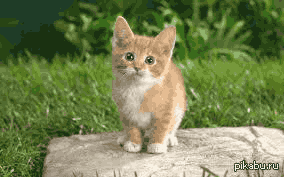

10749
Количество цветов 64
--- 13.99672269821167 seconds ---


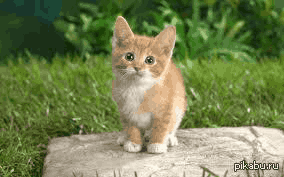

10478
Количество цветов 128
--- 24.689850091934204 seconds ---


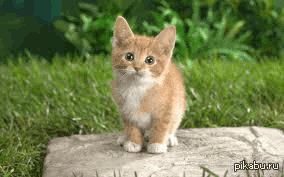

10199
Количество цветов 256
--- 42.775909185409546 seconds ---


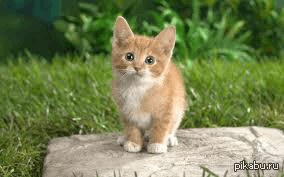

10036


In [ ]:
COLORS = [2, 3, 4, 8, 16, 32, 64, 128, 256]
table = []
max_iters = 40
for K in COLORS:
  print('Количество цветов', K)
  start_time = time.time()
  Kvec,Dmin = kmeans(ReshapedData,K,max_iters)
  time_value = time.time() - start_time
  print("--- %s seconds ---" % (time_value))

  Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))

  for jj in range(0,K):
      Dvec[jj==Dmin,:] = Kvec[jj,:]

  imout = np.reshape(np.uint8(Dvec), (np.size(Datain,0),np.size(Datain,1),len(Kvec[0,:])))

  im = Image.fromarray(imout,'RGB')
  im.show()
  im.save('output.jpeg', "JPEG", optimize = True)
  image_size = os.stat('output.jpeg').st_size
  print(image_size)

  table.append([K, image_size, time_value])

In [ ]:
df2 = pd.DataFrame(table, columns=['К-во цветов', 'Объём изображения', 'Время'])

In [ ]:
result = pd.concat([df, df2], axis=1)
result

,К-во цветов,Объём в байтах,Время,К-во цветов,Объём изображения,Время
0,2,15307,0.708469,2,7183,2.222376
1,3,25278,0.974551,3,11283,3.796897
2,4,27570,0.894666,4,11778,5.195020
3,8,29217,1.156971,8,11351,4.535721
4,16,28298,3.398082,16,11235,7.440146
5,32,27331,3.422300,32,10749,6.313247
6,64,25586,9.124470,64,10478,13.996723
7,128,23987,19.528749,128,10199,24.689850
8,256,22569,48.281348,256,10036,42.775909


## Вывод
Max_iters = 40
K = 128

Img's shape:  (300, 400, 3)
Объём изображения 31008


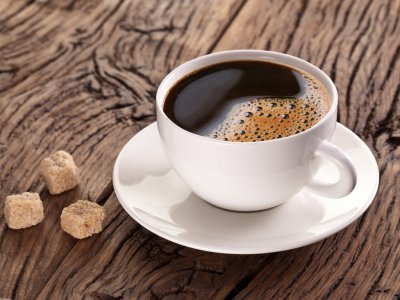

--- 49.28376913070679 seconds ---


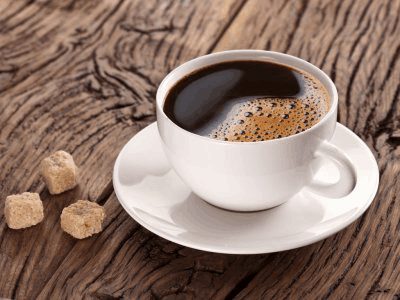

Объём изображения 25336
Img's shape:  (196, 296, 3)
Объём изображения 29741


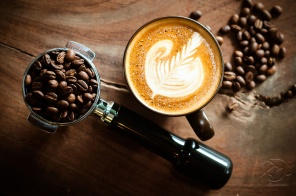

--- 23.746243000030518 seconds ---


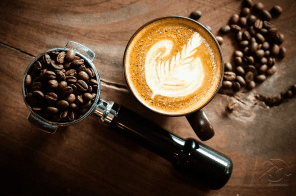

Объём изображения 12395
Img's shape:  (250, 300, 3)
Объём изображения 31008


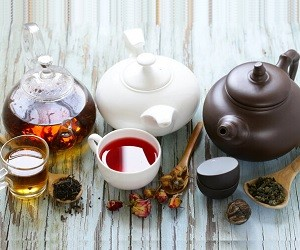

--- 29.893544912338257 seconds ---


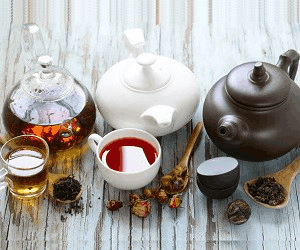

Объём изображения 17767
Img's shape:  (250, 450, 3)
Объём изображения 36268


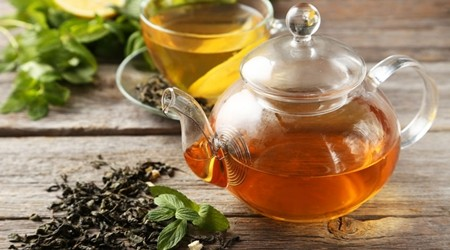

--- 46.79391813278198 seconds ---


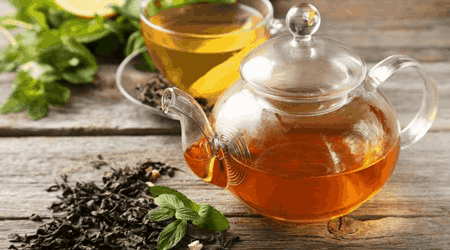

Объём изображения 24576


In [ ]:
images = ['coffee.jpg', 'coffee_2.jpg', 'tea.jpg', 'tea_2.jpg']
max_iters = 40
K = 128

for image in images:
  img = cv2.imread(image) # Вводим исходное изображение
  print("Img's shape: ", img.shape)
  image_size = os.stat(image).st_size
  print('Объём изображения', image_size)
  cv2_imshow(img)

  Datain = np.asarray(Image.open(image),dtype=np.float64)

  ReshapedData = np.reshape(Datain, (np.size(Datain,0) * np.size(Datain,1),np.size(Datain,2)))
  
  start_time = time.time()
  Kvec,Dmin = kmeans(ReshapedData,K,max_iters)
  time_value = time.time() - start_time
  print("--- %s seconds ---" % (time_value))

  Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))

  for jj in range(0,K):
      Dvec[jj==Dmin,:] = Kvec[jj,:]

  imout = np.reshape(np.uint8(Dvec), (np.size(Datain,0),np.size(Datain,1),len(Kvec[0,:])))

  im = Image.fromarray(imout,'RGB')
  im.show()
  im.save('output.jpeg', "JPEG", optimize = True)
  image_size = os.stat('output.jpeg').st_size
  print('Объём изображения', image_size)